In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu

In [10]:
semi_naive_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/semi_naive_vs_control_naive_deseq.tsv', sep="\t")

expressed_genes_set = set(semi_naive_deseq['gene_id'])
print("length of expressed_genes_set: ", len(expressed_genes_set))

transcript_data = []

with open('/ceph/hpc/home/novljanj/data_storage/genomes/genome_m39/gencode.vM27.chr_patch_hapl_scaff.annotation.gtf', 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue

        columns = line.strip().split('\t')
        attributes = columns[8]

        if 'transcript_id' in attributes:
            gene_name = [field for field in attributes.split(';') if 'gene_name' in field][0]
            gene_name = gene_name.split('"')[1]
            gene_id = [field for field in attributes.split(';') if 'gene_id' in field][0]
            gene_id = gene_id.split('"')[1]
            transcript_id = [field for field in attributes.split(';') if 'transcript_id' in field][0]
            transcript_id = transcript_id.split('"')[1]
            gene_type = [field for field in attributes.split(';') if 'gene_type' in field][0]
            gene_type = gene_type.split('"')[1]

            transcript_data.append(columns[:7] + [gene_id] + [gene_name] + [transcript_id] + [gene_type])

column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', "strand", "gene_id", "gene_name", 'transcript_id', 'gene_type']

annotation = pd.DataFrame(transcript_data, columns=column_names)
annotation['start'] = annotation['start'].astype(int) - 1
annotation = annotation[annotation['feature'] == 'transcript']

gene_id_to_name = dict(zip(annotation['gene_id'], annotation['gene_name']))

expressed_gene_names_set = set([gene_id_to_name[gene_id] for gene_id in expressed_genes_set])
expressed_gene_names_set

length of expressed_genes_set:  16484


{'Gm20431',
 'Ccdc28a',
 'Rbm15b',
 'AW549877',
 'Med23',
 'Egln1',
 'Timm17a',
 'Hectd2',
 'Ahsg',
 'Sox2',
 'Dgat1',
 'Mfhas1',
 'Fam133b',
 'Ube2g2',
 'Uxs1',
 'Zfp334',
 'Gm6475',
 'Pafah2',
 'Gm37499',
 'Top1',
 'Misp3',
 'B130034C11Rik',
 'Alg3',
 'Rpl11',
 'Tmem150c',
 'Tomm22',
 'Rps6ka6',
 'Fam8a1',
 'Ap3m2',
 'Gm4342',
 'Rprl1',
 'Psma7',
 'Pgap2',
 'Limk1',
 'Pdzd8',
 'Slc25a40',
 'Gm5883',
 'BC005537',
 'ENSMUSG00002076937',
 'Mir5099',
 'Gm15899',
 'Slc25a28',
 'Rpl36al',
 'Gm13068',
 'Nfic',
 'Atg13',
 'Hrh1',
 'Uckl1',
 'Gm10323',
 'Tcf7l2',
 'Olfr1388',
 'Cmtr2',
 'Tex26',
 'Zbtb20',
 'Tcf25',
 'Gm9385',
 'Clstn3',
 'Gm5239',
 'Gm45718',
 'Bpnt1',
 'Psmf1',
 'Chchd7',
 'Mrpl40',
 'Setd6',
 'Eaf2',
 'Ncald',
 '1700019D03Rik',
 'Slc30a7',
 'Cyb5a',
 'Emc4',
 'Ttc41',
 'Derpc',
 'St3gal5',
 'Exosc9',
 'Polr2g',
 'Emp1',
 'Slc20a1',
 'Stap2',
 'Dnmt3a',
 'Lysmd1',
 'Ube2k',
 'Anp32e',
 'Ostf1',
 'Rnf165',
 'D1Pas1',
 'Qtrt1',
 'Nol9',
 'Thumpd3',
 'Gm37463',
 'Ssr2',
 'Gsc'

In [11]:
half_lifes = pd.read_excel('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/half_life_data/41592_2017_BFnmeth4435_MOESM4_ESM.xls', sheet_name='global RNA half-lives', header=0)
half_lifes['Name'] = half_lifes['Name'].astype(str)
half_lifes = half_lifes[(half_lifes['Name'].isin(expressed_gene_names_set))]
half_lifes

,Chromosome,Start,End,Name,Length,Strand,Half-life (h),k (cpm/h),stderror Half-life,stderror k,Rsquare
1,chr7,116104957,116105210,1110004F10Rik,253,+,5.936154,0.116767,1.944206,0.056869,0.822637
4,chr15,76950480,76950979,1110038F14Rik,499,+,3.212736,0.215750,0.714446,0.061699,0.894247
5,chr10,83762511,83762762,1500009L16Rik,251,+,6.060218,0.114377,2.828555,0.100110,0.609735
7,chr17,14944679,14944990,1600012H06Rik,311,+,2.282191,0.303720,0.715118,0.138600,0.736307
10,chr14,54690492,54690742,1700123O20Rik,250,+,1.392595,0.497738,0.238069,0.102636,0.907563
...,...,...,...,...,...,...,...,...,...,...,...
6658,chrX,163952927,163953177,Zrsr2,250,-,5.315421,0.130403,1.450899,0.048959,0.870613
6659,chr13,21442174,21442432,Zscan26,258,-,0.745045,0.930343,0.217440,0.383419,0.641365
6660,chr11,62267223,62267482,Zswim7,259,-,6.307095,0.109900,2.241834,0.060605,0.735318
6661,chr9,64137143,64137395,Zwilch,252,-,4.964903,0.139609,1.657282,0.069951,0.790147


In [5]:
masterfile = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile/all_smOOPS_and_controls_V2.tsv', sep='\t')
masterfile["all_smoops"] = masterfile["smoops_naive"] | masterfile["smoops_epi"] | masterfile["smoops_diff"]
masterfile

,chr,start,end,gene_id,feature,strand,gene_name,transcript_id,feature_length,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,all_smoops
0,chr1,3284704,3741721,ENSMUSG00000051951.6,transcript,-,Xkr4,ENSMUST00000070533.5,457017,False,True,True,False,3.872970,2.324972,0.014051,194.333000,235.666667,0.666667,True
1,chr1,3435953,3438772,ENSMUSG00000103377.2,transcript,-,Gm37180,ENSMUST00000195335.2,2819,False,True,True,False,0.521827,0.301747,0.012481,22.666667,26.666667,0.333333,True
2,chr1,3445778,3448011,ENSMUSG00000104017.2,transcript,-,Gm37363,ENSMUST00000192336.2,2233,False,False,True,False,0.485116,0.206451,0.000000,14.333333,15.666667,0.000000,True
3,chr1,3535199,3537508,ENSMUSG00000103025.2,transcript,-,Gm37686,ENSMUST00000194099.2,2309,False,False,True,False,0.627143,0.321620,0.000000,18.000000,24.666667,0.000000,True
4,chr1,3582673,3584730,ENSMUSG00000103201.2,transcript,-,Gm37329,ENSMUST00000192973.2,2057,False,False,True,False,1.040409,0.393665,0.000000,30.333333,25.333333,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,chrX,160616291,160942726,ENSMUSG00000059493.14,transcript,-,Nhs,ENSMUST00000087085.10,326435,False,True,True,False,0.707368,0.917609,0.077997,91.000000,245.000000,6.000000,True
3056,chrX,165173028,165223700,ENSMUSG00000040586.9,transcript,-,Ofd1,ENSMUST00000049501.9,50672,False,True,True,False,2.596442,2.308879,1.399653,165.333333,326.725000,86.666667,True
3057,chrX,168094525,168103276,ENSMUSG00000031352.11,transcript,-,Hccs,ENSMUST00000033717.9,8751,False,False,False,True,8.779636,9.323919,9.318443,270.333333,630.333333,302.000333,False
3058,chrY,1260770,1286629,ENSMUSG00000069045.12,transcript,-,Ddx3y,ENSMUST00000091190.12,25859,False,True,True,False,12.061610,9.830595,1.813766,633.994667,1141.029333,96.344667,True


In [4]:
clusters = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/machine_learning_results/cluster_assignment_file/cluster_of_all_model.tsv', sep='\t')
clusters

,transcript_id,Cluster
0,ENSMUST00000000199.8,0
1,ENSMUST00000000291.9,0
2,ENSMUST00000000312.12,0
3,ENSMUST00000000314.13,0
4,ENSMUST00000000642.11,0
...,...,...
1819,ENSMUST00000239449.2,0
1820,ENSMUST00000239483.2,0
1821,ENSMUST00000239525.1,0
1822,ENSMUST00000239527.1,0


In [14]:
merged = pd.merge(half_lifes, masterfile, right_on='gene_name', left_on='Name', how='left')   
merged = pd.merge(merged, clusters, on='transcript_id', how='left')

merged = merged.rename(columns={'k (cpm/h)': 'k (cpm per h)'})

merged["naive_smoops_in_cluster0"] = (merged["Cluster"] == 0) & (merged["smoops_naive"])
merged["naive_smoops_in_cluster1"] = (merged["Cluster"] == 1) & (merged["smoops_naive"])

merged["control_all"] = ~merged["all_smoops"].astype(bool)

print(merged["control_all"].value_counts())
print(merged["naive_smoops_in_cluster0"].sum())
print(merged["naive_smoops_in_cluster1"].sum())
merged


control_all
False    5969
True      489
Name: count, dtype: int64
198
18


,Chromosome,Start,End,Name,Length,Strand,Half-life (h),k (cpm per h),stderror Half-life,stderror k,...,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,all_smoops,Cluster,naive_smoops_in_cluster0,naive_smoops_in_cluster1,control_all
0,chr7,116104957,116105210,1110004F10Rik,253,+,5.936154,0.116767,1.944206,0.056869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,chr15,76950480,76950979,1110038F14Rik,499,+,3.212736,0.215750,0.714446,0.061699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,chr10,83762511,83762762,1500009L16Rik,251,+,6.060218,0.114377,2.828555,0.100110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,chr17,14944679,14944990,1600012H06Rik,311,+,2.282191,0.303720,0.715118,0.138600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,chr14,54690492,54690742,1700123O20Rik,250,+,1.392595,0.497738,0.238069,0.102636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6453,chrX,163952927,163953177,Zrsr2,250,-,5.315421,0.130403,1.450899,0.048959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6454,chr13,21442174,21442432,Zscan26,258,-,0.745045,0.930343,0.217440,0.383419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6455,chr11,62267223,62267482,Zswim7,259,-,6.307095,0.109900,2.241834,0.060605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6456,chr9,64137143,64137395,Zwilch,252,-,4.964903,0.139609,1.657282,0.069951,...,32.366821,37.650132,599.332667,1422.333667,755.999333,False,NaN,False,False,True


control_all: 489 data points, mean = 3.57
naive_smoops_in_cluster0: 198 data points, mean = 3.73
control_all vs naive_smoops_in_cluster0: p-value = 0.239
control_all: 489 data points, mean = 3.57
naive_smoops_in_cluster1: 18 data points, mean = 3.85
control_all vs naive_smoops_in_cluster1: p-value = 0.380


/tmp/ipykernel_138770/173604657.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_138770/173604657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_138770/173604657.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions)


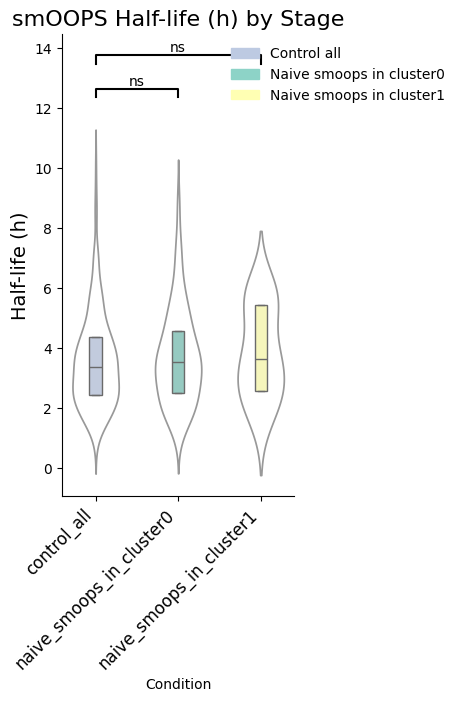

control_all: 489 data points, mean = 0.24
naive_smoops_in_cluster0: 198 data points, mean = 0.23
control_all vs naive_smoops_in_cluster0: p-value = 0.239
control_all: 489 data points, mean = 0.24
naive_smoops_in_cluster1: 18 data points, mean = 0.21
control_all vs naive_smoops_in_cluster1: p-value = 0.380


/tmp/ipykernel_138770/173604657.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_138770/173604657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_138770/173604657.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions)


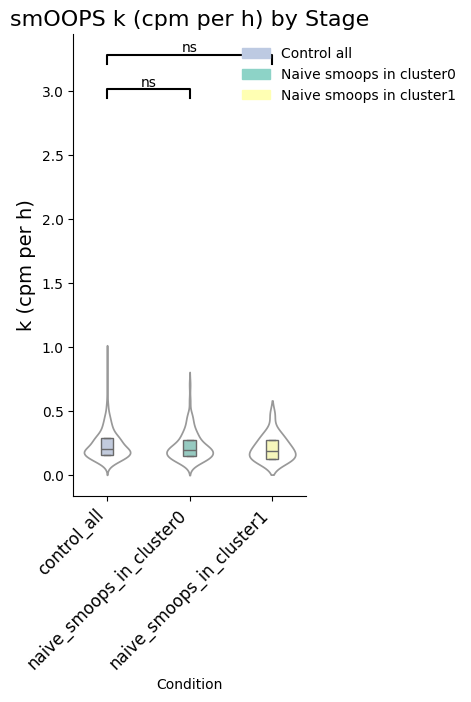

control_all: 489 data points, mean = 1.70
naive_smoops_in_cluster0: 198 data points, mean = 1.76
control_all vs naive_smoops_in_cluster0: p-value = 0.279
control_all: 489 data points, mean = 1.70
naive_smoops_in_cluster1: 18 data points, mean = 1.83
control_all vs naive_smoops_in_cluster1: p-value = 0.398


/tmp/ipykernel_138770/173604657.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_138770/173604657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_138770/173604657.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions)


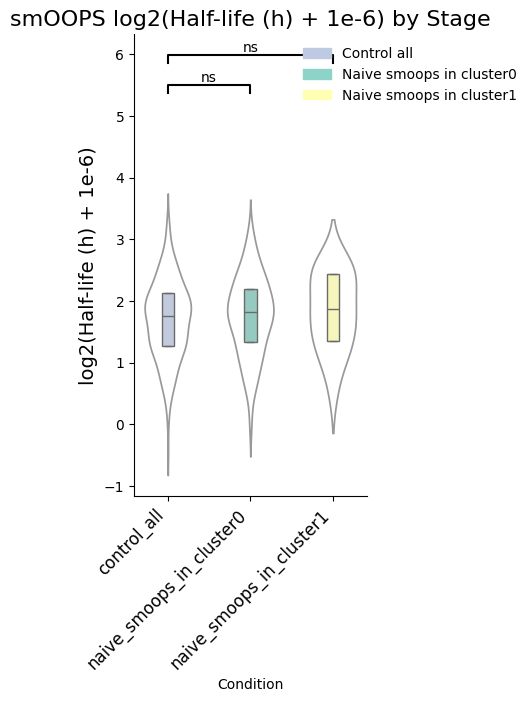

control_all: 489 data points, mean = -2.23
naive_smoops_in_cluster0: 198 data points, mean = -2.29
control_all vs naive_smoops_in_cluster0: p-value = 0.279
control_all: 489 data points, mean = -2.23
naive_smoops_in_cluster1: 18 data points, mean = -2.36
control_all vs naive_smoops_in_cluster1: p-value = 0.398


/tmp/ipykernel_138770/173604657.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_138770/173604657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_138770/173604657.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions)


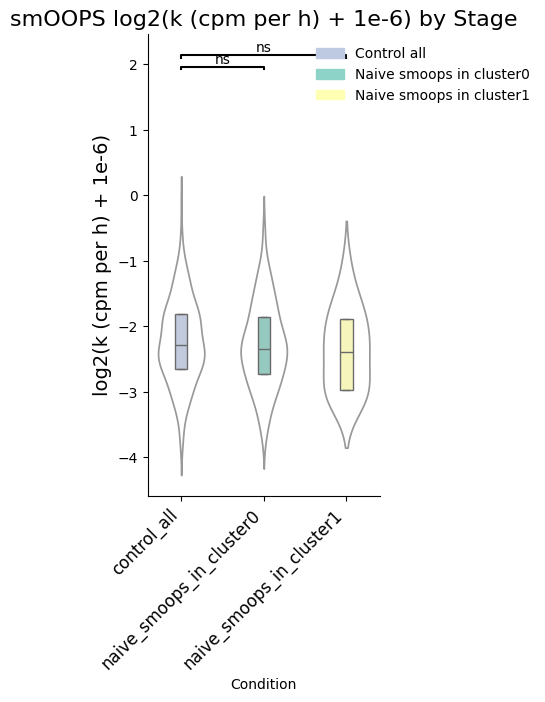

In [15]:
def plot_boxplot(df, value_column, control_column, compare_boolean_columns, log=False, stat_test='t-test'):

    df = df.copy()
    df = df[df[value_column].notna()]
    df[value_column] = df[value_column].astype(float)
    if log:
        df[f'log2({value_column} + 1e-6)'] = np.log2(df[value_column] + 1e-6)
        value_column = f'log2({value_column} + 1e-6)'

    conditions = [control_column] + compare_boolean_columns
    filtered_data = pd.DataFrame({
        condition: df[df[condition] == True][value_column] for condition in conditions
    })

    melted_data = filtered_data.melt(var_name='Condition', value_name=value_column)
    
    comparisons = [(control_column, condition) for condition in compare_boolean_columns]
    results = []
    for test_a, test_b in comparisons:
        test_a_data = filtered_data[test_a].dropna().to_list()
        test_b_data = filtered_data[test_b].dropna().to_list()
        print(f'{test_a}: {len(test_a_data)} data points, mean = {np.mean(test_a_data):.2f}')
        print(f'{test_b}: {len(test_b_data)} data points, mean = {np.mean(test_b_data):.2f}')
        if stat_test == 't-test':
            stat, p_val = ttest_ind(test_a_data, test_b_data, equal_var=False)
        elif stat_test == 'mannwhitneyu':
            stat, p_val = mannwhitneyu(test_a_data, test_b_data)
        results.append((test_a, test_b, p_val))
        print(f'{test_a} vs {test_b}: p-value = {p_val:.3f}')
        
    hex_palette = {control_column: '#bdcae2'}
    hex_palette.update({name: sns.color_palette('Set3')[idx] for idx, name in enumerate(compare_boolean_columns)})
    white_palette = {key: '#FFFFFF' for key in hex_palette.keys()}
    
    plt.figure(figsize=(len(compare_boolean_columns) * 0.5 + 2, 6))

    sns.violinplot(x='Condition', y=value_column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)

    ax = sns.boxplot(x='Condition', y=value_column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)    
    
    y_max = melted_data[value_column].max() + 2
    y_step = y_max / 11

    for idx, (test_a, test_b, p_val) in enumerate(results):
        x1, x2 = conditions.index(test_a), conditions.index(test_b)
        y, h = y_max + idx * y_step, y_step / 4
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color='black')
    
    plt.title(f'smOOPS {value_column} by Stage', fontsize=16)
    plt.ylabel(f'{value_column}', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    ax.set_xticklabels(conditions)

    legend_elements = [mpatches.Patch(color=hex_palette[name], label=name.replace('_', ' ').capitalize()) for name in hex_palette]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.7, 1), frameon=False)
    sns.despine()
    plt.show()
    
plot_boxplot(merged, value_column='Half-life (h)', control_column='control_all', compare_boolean_columns=['naive_smoops_in_cluster0', 'naive_smoops_in_cluster1'], log=False, stat_test='mannwhitneyu')
plot_boxplot(merged, value_column='k (cpm per h)', control_column='control_all', compare_boolean_columns=['naive_smoops_in_cluster0', 'naive_smoops_in_cluster1'], log=False, stat_test='mannwhitneyu')
plot_boxplot(merged, value_column='Half-life (h)', control_column='control_all', compare_boolean_columns=['naive_smoops_in_cluster0', 'naive_smoops_in_cluster1'], log=True)
plot_boxplot(merged, value_column='k (cpm per h)', control_column='control_all', compare_boolean_columns=['naive_smoops_in_cluster0', 'naive_smoops_in_cluster1'], log=True)
